In [7]:
%cd /content/drive/MyDrive/SOD_Project



/content/drive/MyDrive/SOD_Project


In [8]:
!git status


Refresh index: 100% (9/9), done.
On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	notebooks/demo_notebook.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [9]:
!git add notebooks/demo_notebook.ipynb


In [ ]:
!git config --global user.name "adeabajraktarii"
!git config --global user.email "adea.bajraktari@xponentl.com"


In [10]:
!git commit -m "Add demo notebook for model visualization and testing"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@24b10f5777f1.(none)')


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import sys
sys.path.append("/content/drive/MyDrive/SOD_Project")

In [9]:
import tensorflow as tf
import os
from src.data_loader import build_dataset
from src.sod_model import build_unet
from src.train import train_model, iou_metric
from src.evaluate import evaluate_model, visualize_prediction
import random


In [10]:
BASE = "/content/drive/MyDrive/SOD_Project/dataset/ecssd_prepared"

train_imgs = os.path.join(BASE, "train/images")
train_masks = os.path.join(BASE, "train/masks")

val_imgs = os.path.join(BASE, "val/images")
val_masks = os.path.join(BASE, "val/masks")

test_imgs = os.path.join(BASE, "test/images")
test_masks = os.path.join(BASE, "test/masks")

SAVE_PATH = "/content/drive/MyDrive/SOD_Project/saved_models/baseline_model.h5"


In [16]:
test_ds = build_dataset(
    images_dir=test_imgs,
    masks_dir=test_masks,
    batch_size=1,
    augment_data=False
)

print("Test dataset loaded.")
print("Type of test_ds:", type(test_ds))

Test dataset loaded.
Type of test_ds: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [17]:
model = train_model(
    train_imgs=train_imgs,
    train_masks=train_masks,
    val_imgs=val_imgs,
    val_masks=val_masks,
    save_path=SAVE_PATH
)


Epoch 1/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7702 - iou_metric: 4.5264e-05 - loss: 1.1179

58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 212ms/step - accuracy: 0.7700 - iou_metric: 4.4662e-05 - loss: 1.1173 - val_accuracy: 0.7633 - val_iou_metric: 1.8984e-11 - val_loss: 1.0296
Epoch 2/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7741 - iou_metric: 0.0436 - loss: 0.9483

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7740 - iou_metric: 0.0467 - loss: 0.9464 - val_accuracy: 0.8104 - val_iou_metric: 0.3867 - val_loss: 0.7212
Epoch 3/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8069 - iou_metric: 0.2905 - loss: 0.7702

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8065 - iou_metric: 0.2899 - loss: 0.7710 - val_accuracy: 0.8053 - val_iou_metric: 0.4165 - val_loss: 0.7053
Epoch 4/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.8100 - iou_metric: 0.3448 - loss: 0.7418 - val_accuracy: 0.8135 - val_iou_metric: 0.3511 - val_loss: 0.7339
Epoch 5/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8094 - iou_metric: 0.3290 - loss: 0.7441 - val_accuracy: 0.8180 - val_iou_metric: 0.3893 - val_loss: 0.7120
Epoch 6/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.8127 - iou_metric: 0.3518 - loss: 0.7299 - val_accuracy: 0.8167 - val_iou_metric: 0.3806 - val_loss: 0.7093
Epoch 7/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8158 - iou_metric: 0.3643 - loss: 0.7186

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.8155 - iou_metric: 0.3641 - loss: 0.7192 - val_accuracy: 0.8176 - val_iou_metric: 0.3844 - val_loss: 0.7045
Epoch 8/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8177 - iou_metric: 0.3599 - loss: 0.7166

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.8173 - iou_metric: 0.3597 - loss: 0.7173 - val_accuracy: 0.8162 - val_iou_metric: 0.3900 - val_loss: 0.6987
Epoch 9/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8175 - iou_metric: 0.3763 - loss: 0.7094

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.8172 - iou_metric: 0.3759 - loss: 0.7102 - val_accuracy: 0.8180 - val_iou_metric: 0.3872 - val_loss: 0.6979
Epoch 10/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.8189 - iou_metric: 0.3762 - loss: 0.7062 - val_accuracy: 0.8190 - val_iou_metric: 0.3827 - val_loss: 0.7011
Epoch 11/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.8189 - iou_metric: 0.3784 - loss: 0.7054 - val_accuracy: 0.8178 - val_iou_metric: 0.3725 - val_loss: 0.7059
Epoch 12/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8208 - iou_metric: 0.3675 - loss: 0.7085

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.8204 - iou_metric: 0.3671 - loss: 0.7092 - val_accuracy: 0.8191 - val_iou_metric: 0.3833 - val_loss: 0.6952
Epoch 13/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.8200 - iou_metric: 0.3751 - loss: 0.7056 - val_accuracy: 0.8196 - val_iou_metric: 0.3778 - val_loss: 0.6975
Epoch 14/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8216 - iou_metric: 0.3783 - loss: 0.6999 - val_accuracy: 0.8197 - val_iou_metric: 0.3802 - val_loss: 0.6955
Epoch 15/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8209 - iou_metric: 0.3758 - loss: 0.7012

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8206 - iou_metric: 0.3755 - loss: 0.7018 - val_accuracy: 0.8210 - val_iou_metric: 0.3830 - val_loss: 0.6927
Epoch 16/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8225 - iou_metric: 0.3775 - loss: 0.6998

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8222 - iou_metric: 0.3772 - loss: 0.7005 - val_accuracy: 0.8217 - val_iou_metric: 0.3820 - val_loss: 0.6904
Epoch 17/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8218 - iou_metric: 0.3790 - loss: 0.7003

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.8215 - iou_metric: 0.3788 - loss: 0.7009 - val_accuracy: 0.8226 - val_iou_metric: 0.3820 - val_loss: 0.6901
Epoch 18/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.8226 - iou_metric: 0.3824 - loss: 0.6951 - val_accuracy: 0.8218 - val_iou_metric: 0.3783 - val_loss: 0.6947
Epoch 19/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8210 - iou_metric: 0.3738 - loss: 0.7055 - val_accuracy: 0.8229 - val_iou_metric: 0.3777 - val_loss: 0.6940
Epoch 20/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.8186 - iou_metric: 0.3640 - loss: 0.7114 - val_accuracy: 0.8220 - val_iou_metric: 0.3751 - val_loss: 0.6940
Epoch 21/25
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8221 - iou_metric: 0.3780 - loss: 0.6997

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.8219 - iou_metric: 0.3780 - loss: 0.7001 - val_accuracy: 0.8238 - val_iou_metric: 0.3907 - val_loss: 0.6832
Epoch 22/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8214 - iou_metric: 0.3778 - loss: 0.6976 - val_accuracy: 0.8233 - val_iou_metric: 0.3846 - val_loss: 0.6893
Epoch 23/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.8213 - iou_metric: 0.3803 - loss: 0.6990 - val_accuracy: 0.8232 - val_iou_metric: 0.3949 - val_loss: 0.6842
Epoch 24/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8203 - iou_metric: 0.3793 - loss: 0.7012 - val_accuracy: 0.8199 - val_iou_metric: 0.3589 - val_loss: 0.7061
Epoch 25/25
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8192 - iou_metric: 0.3673 - loss: 0.7076 - val_accuracy: 0.8246 - val_iou_metric: 0.3873 - val_loss: 0.6835


In [18]:
from src.train import bce_iou_loss

model = tf.keras.models.load_model(
    SAVE_PATH,
    custom_objects={
        "iou_metric": iou_metric,
        "bce_iou_loss": bce_iou_loss
    }
)

print("Baseline model loaded successfully.")



Baseline model loaded successfully.


In [19]:
print("\nEvaluating Baseline Model...")
metrics = evaluate_model(model, test_ds)

print("\n=== BASELINE TEST METRICS ===")
print("Precision:", metrics["precision"])
print("Recall:",    metrics["recall"])
print("F1 Score:",  metrics["f1"])
print("IoU:",       metrics["iou"])




Evaluating Baseline Model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


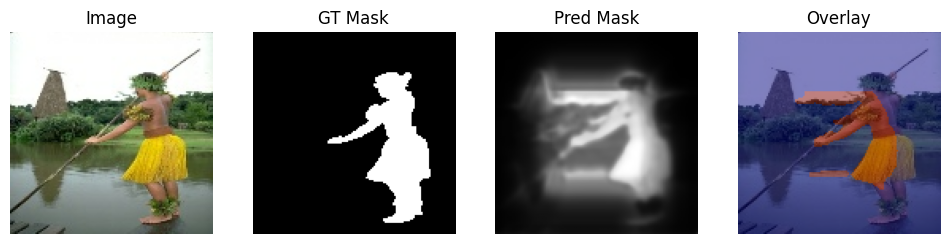

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


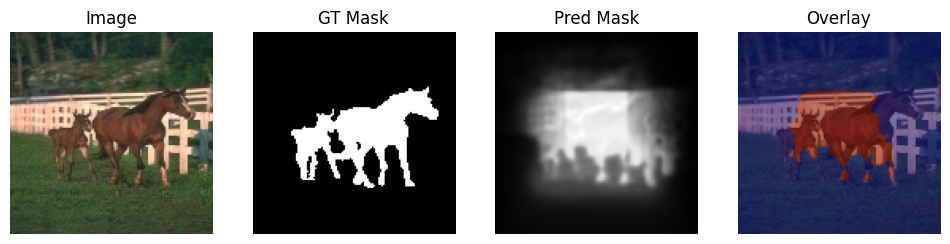

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


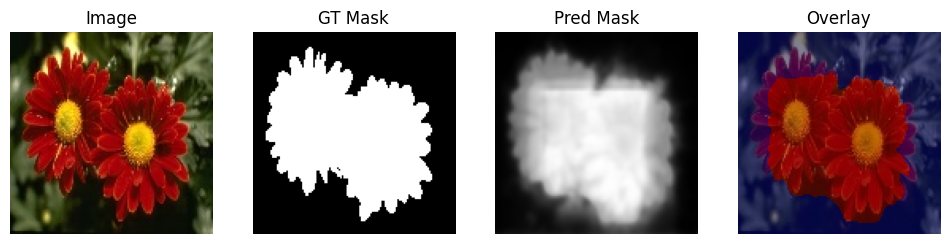

In [20]:
count = 0
for imgs, masks in test_ds:
    visualize_prediction(model, imgs[0], masks[0])
    count += 1
    if count == 3:
        break